In [1]:
import torch
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from aer_utils.utils import get_word2word_contrib, get_alignments
from aer_utils.small_utils import separate_words

# S2S Example

In [2]:
test_set_dir = '/private/home/alastruey/speech_gold_alignment'
with open(f'{test_set_dir}/dataset/english/en_dataset.json') as json_file:
    en_dict_all = json.load(json_file)

with open(f'{test_set_dir}/dataset/german/de_dataset.json') as json_file:
    de_dict_all = json.load(json_file)

In [16]:
i = '200'
contributions = torch.load(f'/path/to/contributions/{i}.p')

Print token-to-token contributions

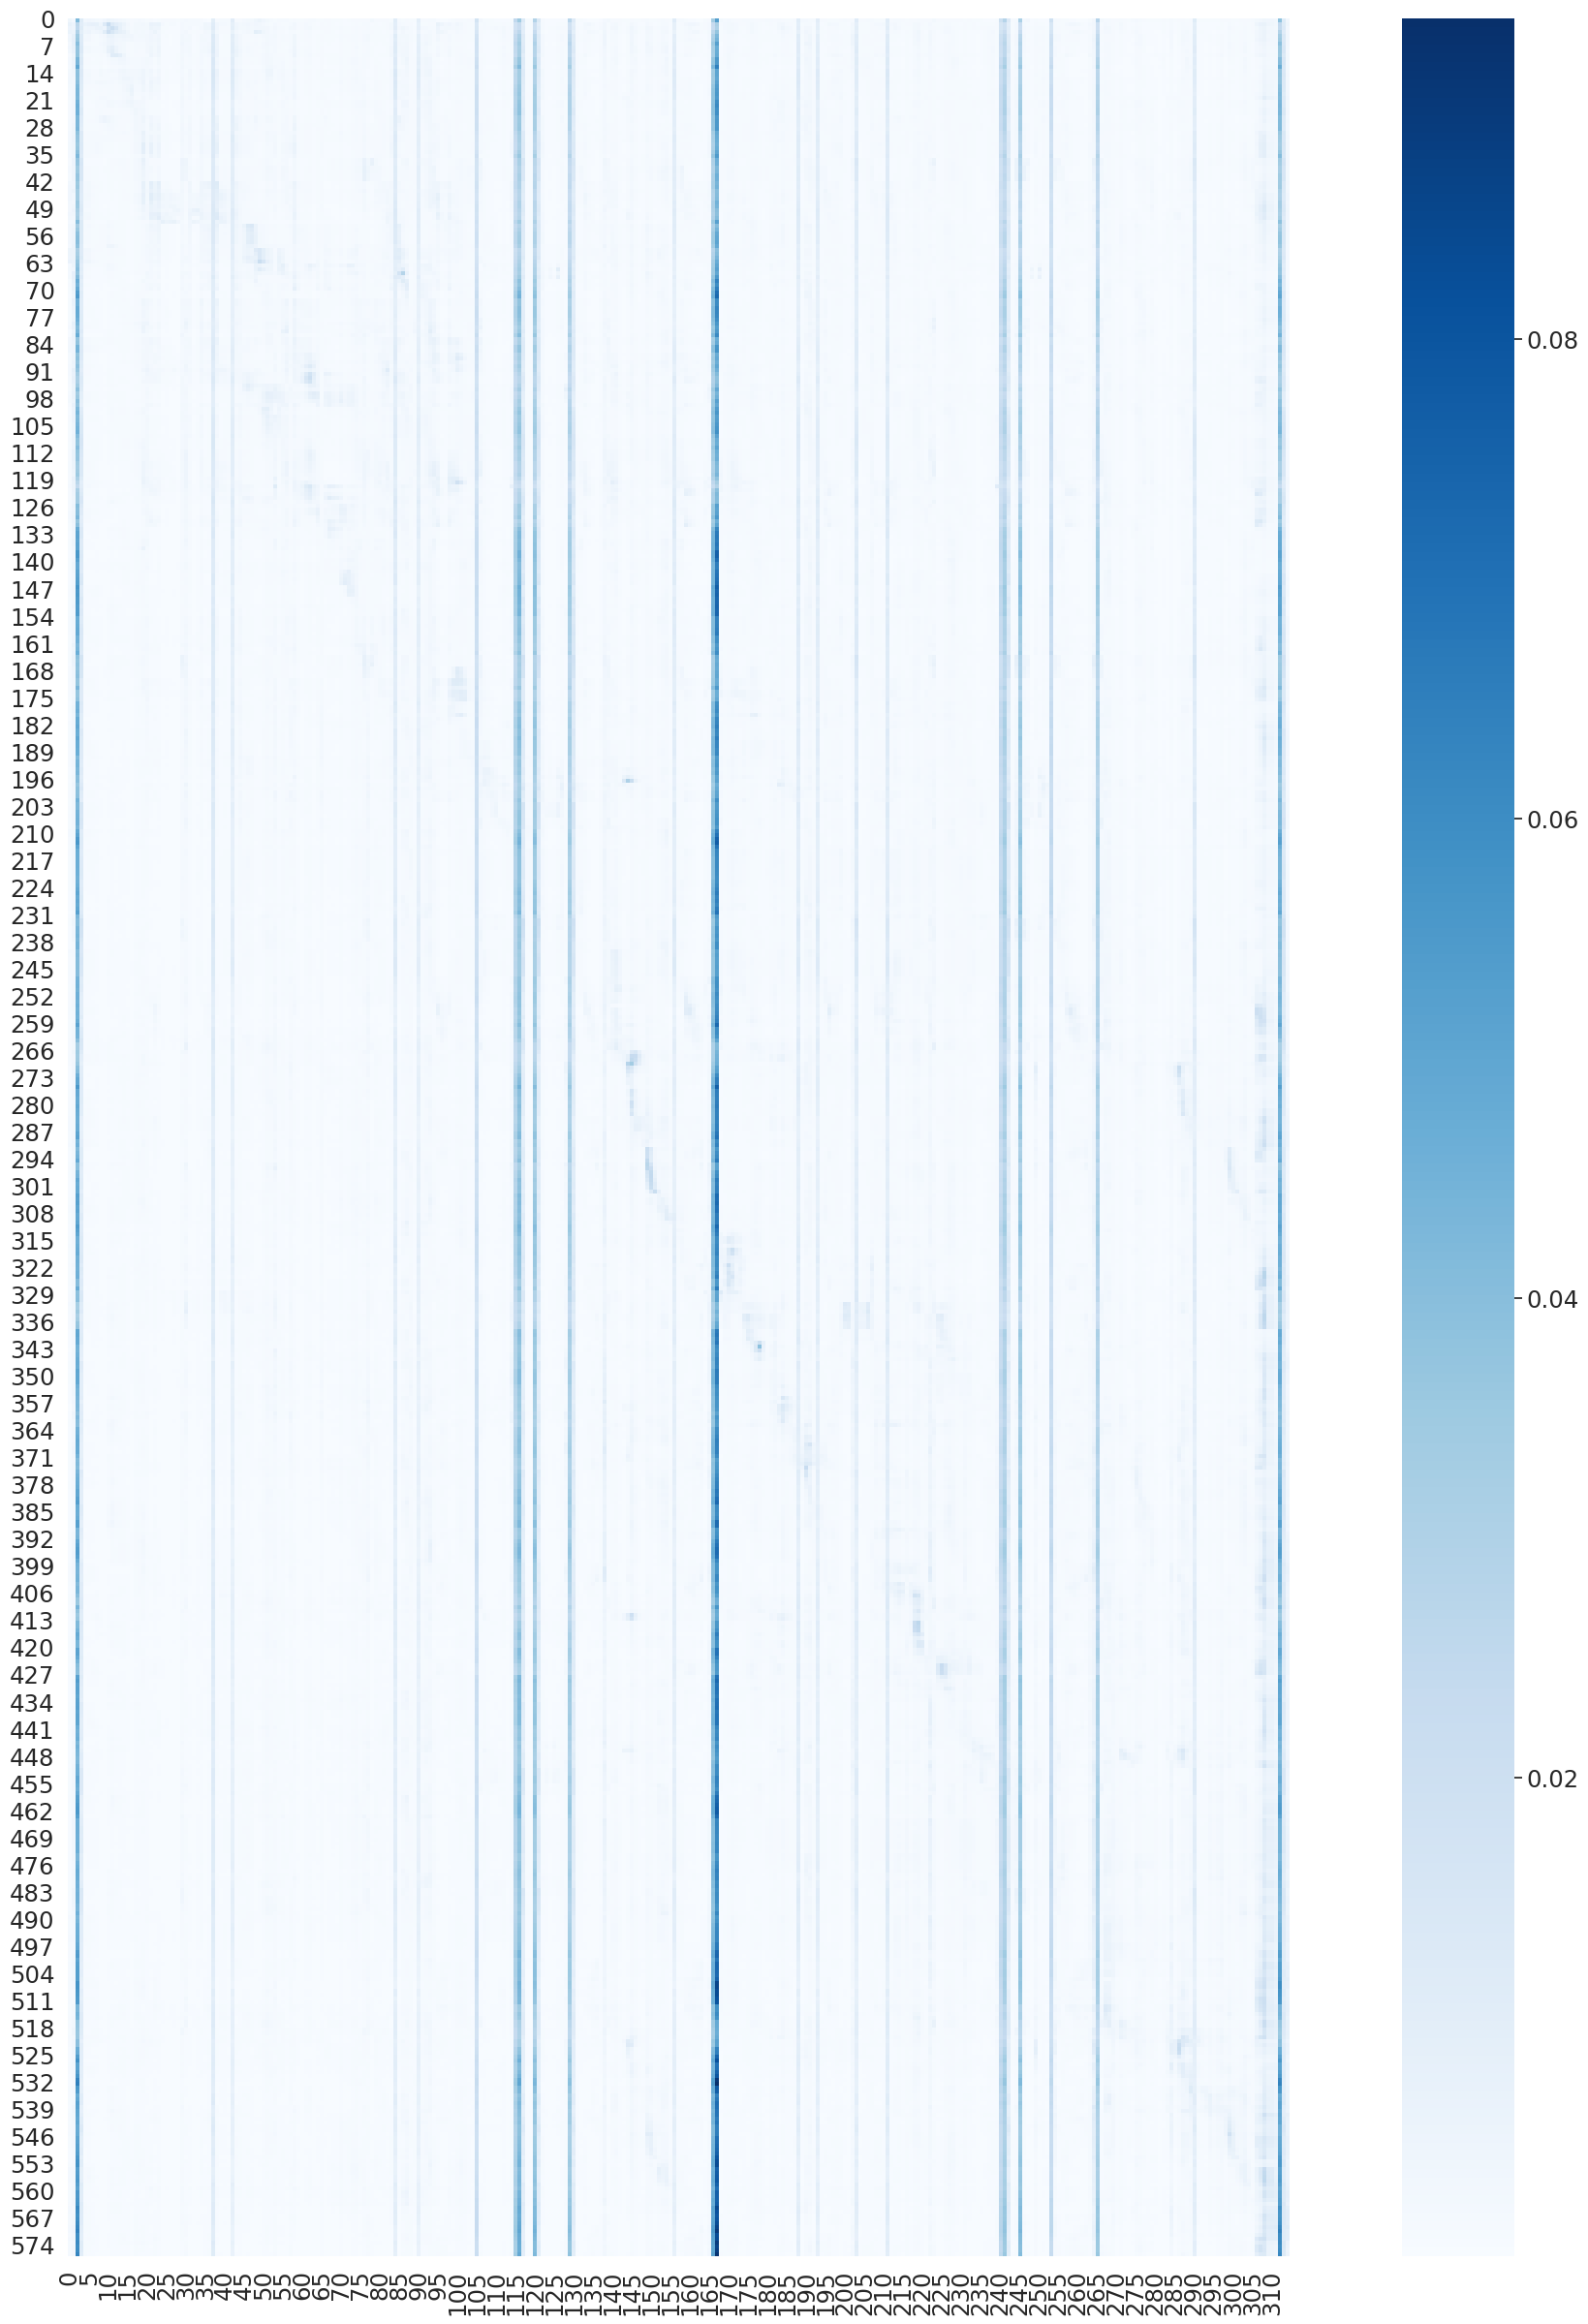

In [17]:
plt.figure(figsize=(30,30))
df = pd.DataFrame(contributions.detach())
sns.set(font_scale=1.6)
sns.heatmap(df,cmap="Blues",square=True,cbar=True);

Obtain and plot word-to-word contributions

In [5]:
setting = 's2s' # s2s or s2t

# Define speech-words dictionaries. Swap them for de-en translation
speech_tgt_dict = en_dict_all[i]['lj_spk']
speech_src_dict = de_dict_all[i]['spk_thorsten']

contributions, source_sentence_, predicted_sentence_ = get_word2word_contrib(contributions, setting, speech_src_dict, speech_tgt_dict, tgt_sentence=None)

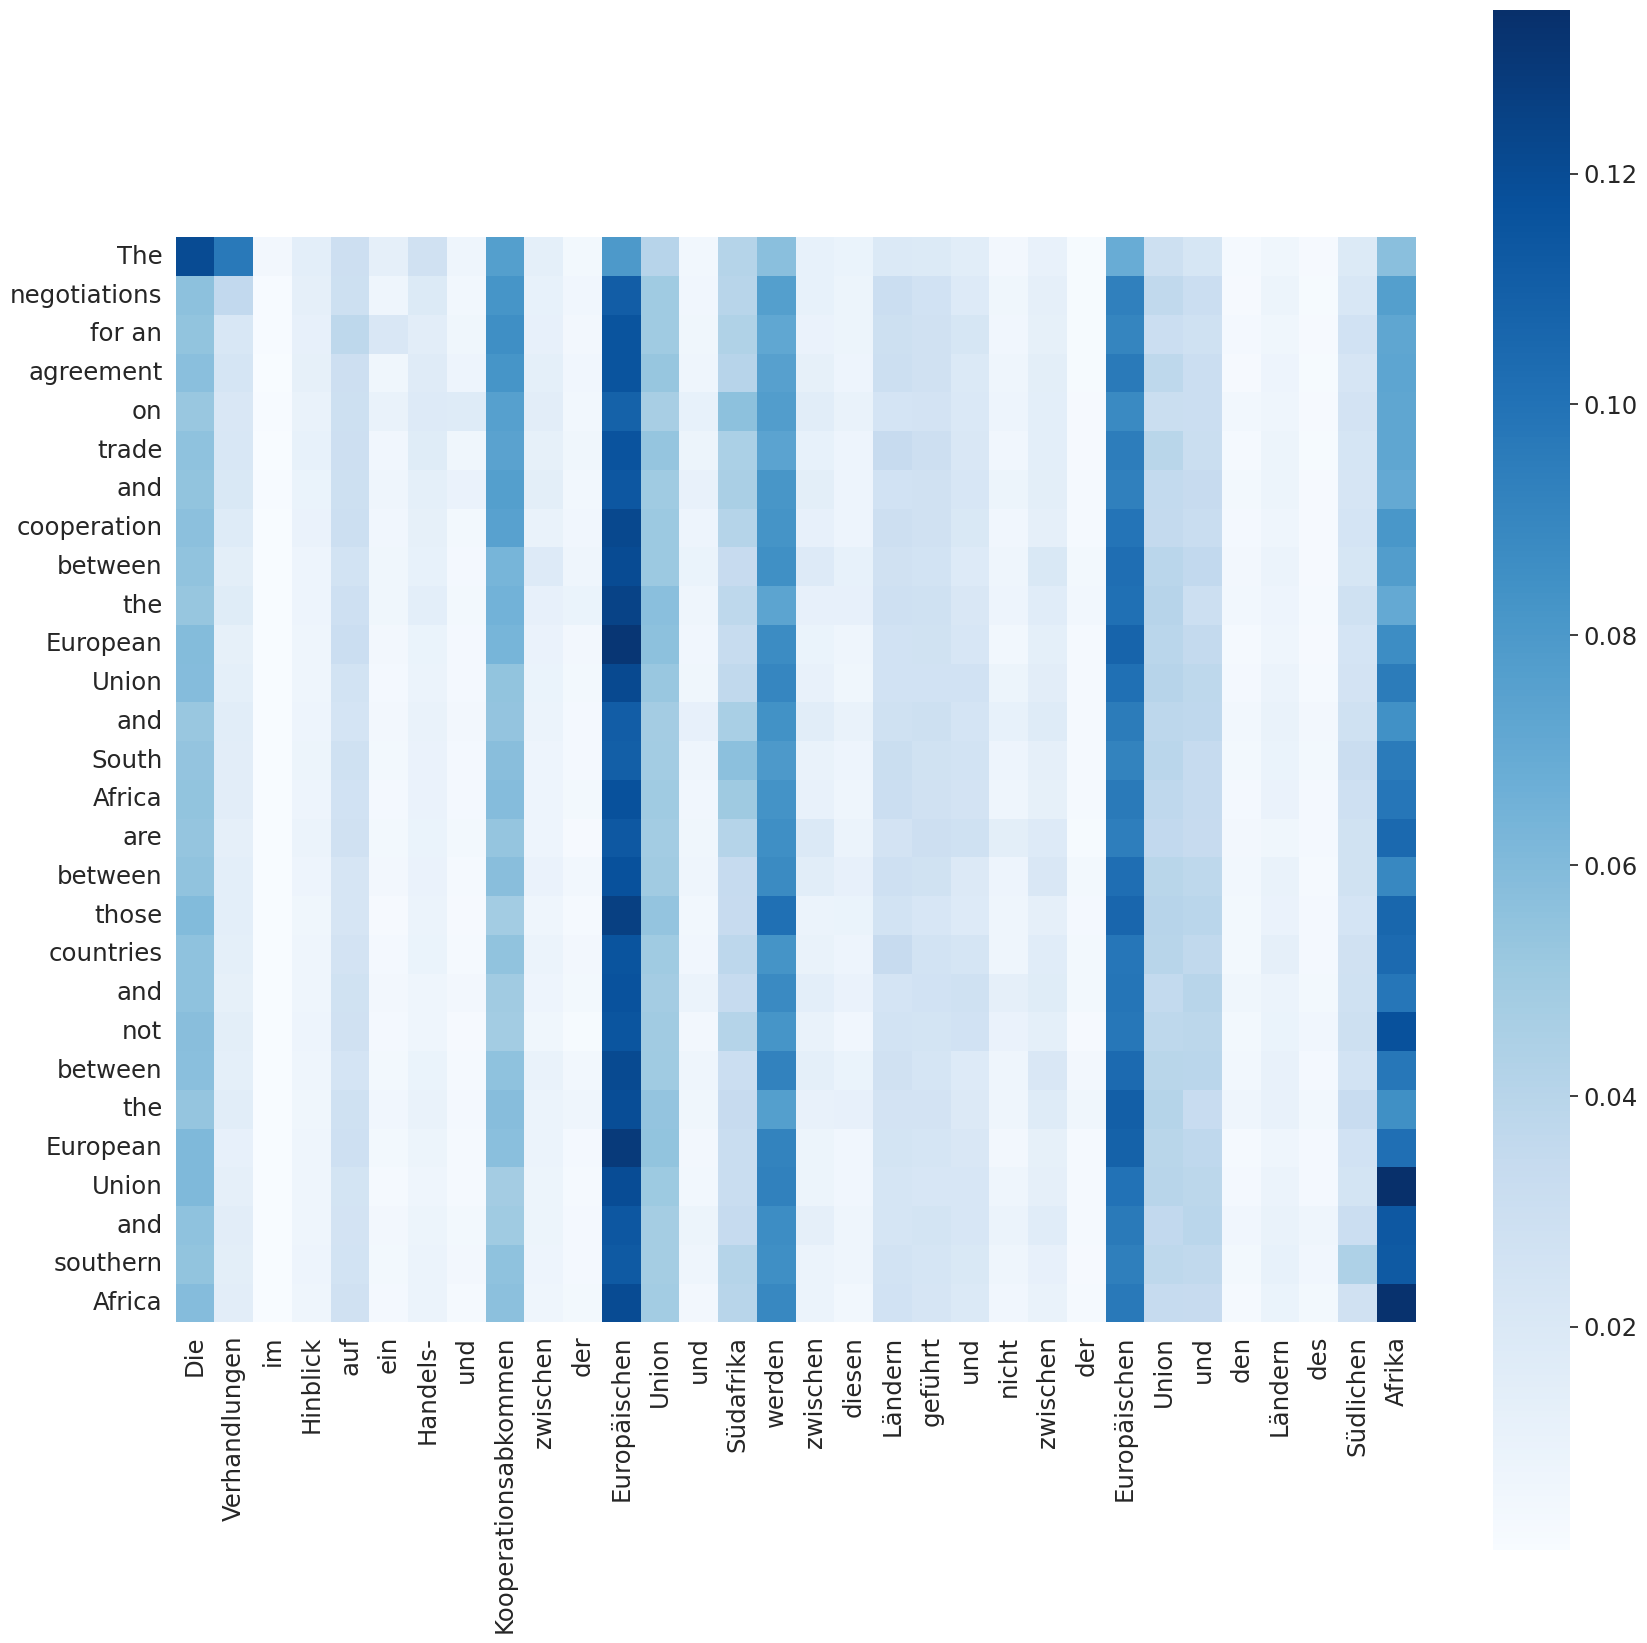

In [10]:
plt.figure(figsize=(20,20))
df = pd.DataFrame(contributions, columns = source_sentence_, index = predicted_sentence_)
sns.set(font_scale=1.6)
sns.heatmap(df,cmap="Blues",square=True,cbar=True);

Extract hard alignments

In [8]:
hard_alignment, alignment_string = get_alignments(contributions, source_sentence_, predicted_sentence_)

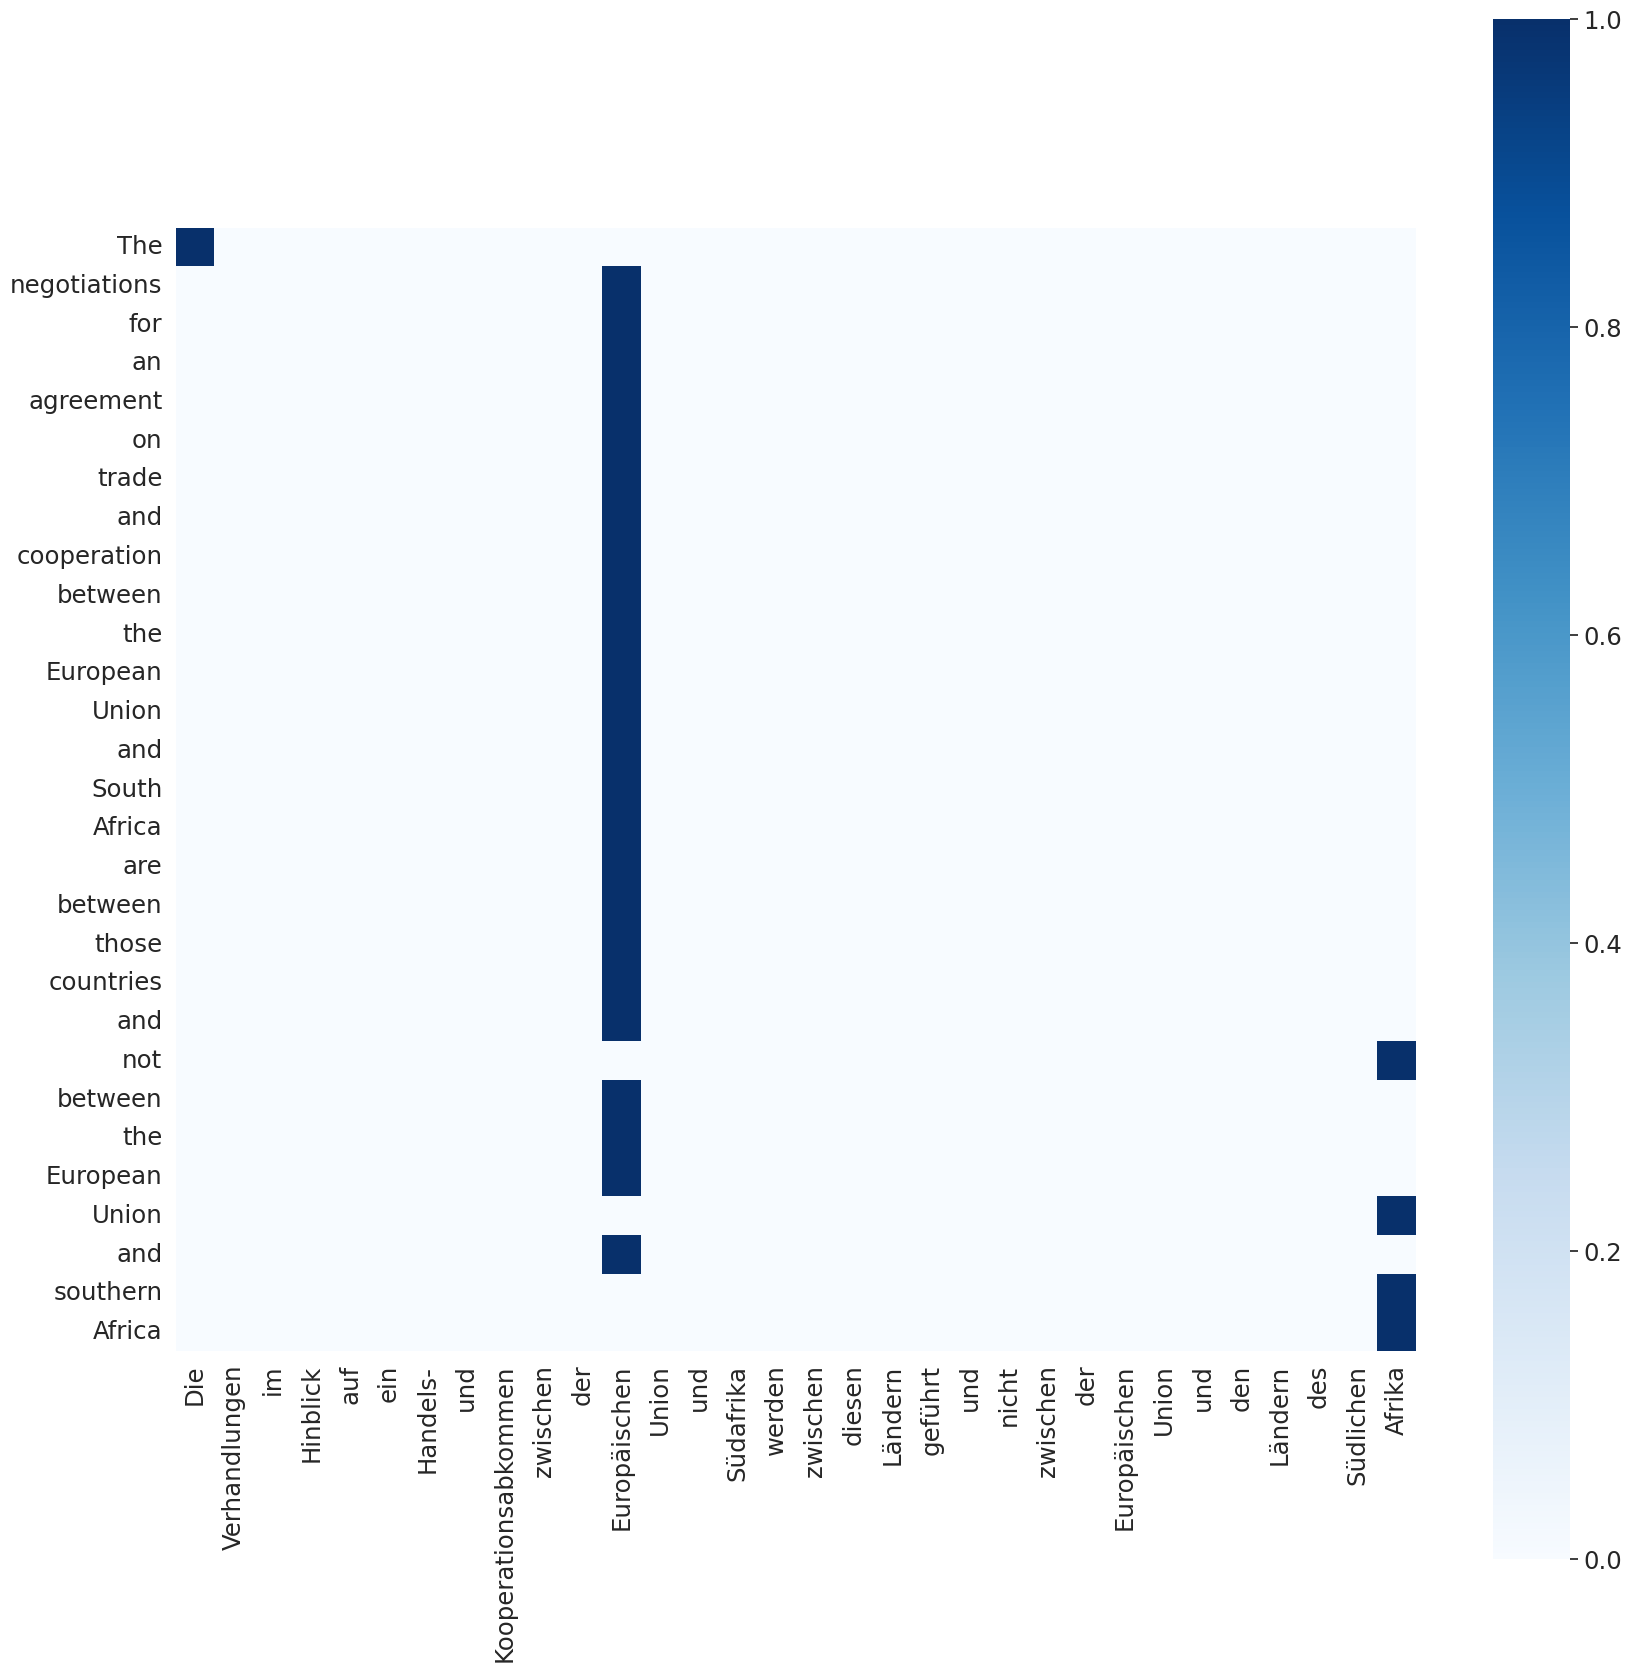

In [11]:
plt.figure(figsize=(20,20))
df = pd.DataFrame(hard_alignment, columns = separate_words(source_sentence_), index = separate_words(predicted_sentence_))
sns.set(font_scale=1.6)
sns.heatmap(df,cmap="Blues",square=True,cbar=True);

# S2T Example

In [2]:
test_set_dir = '/private/home/alastruey/speech_gold_alignment'
with open(f'{test_set_dir}/dataset/english/en_dataset.json') as json_file:
    en_dict_all = json.load(json_file)

with open(f'{test_set_dir}/dataset/german/de_dataset.json') as json_file:
    de_dict_all = json.load(json_file)

with open(f'/private/home/alastruey/whisper/whisper-small-deen/processed_tokens.txt') as txt_file:
    all_tgt_tokens = txt_file.readlines()

We create a fake tensor but it should be the contributions corresponding to index i

In [23]:
i = '333' #003 106 206 306 333

tgt_sentence = all_tgt_tokens[int(i)]
tgt_sentence = tgt_sentence.replace('\n', '').split(' ') 
contributions = torch.load(f'/path/to/contributions/{i}.pt')

Print token-to-token contributions

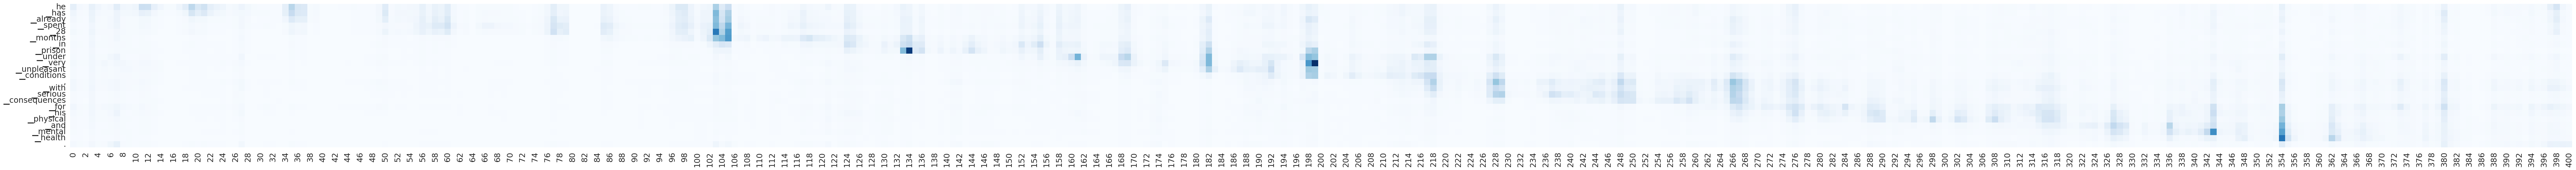

In [24]:
plt.figure(figsize=(100,200))
df = pd.DataFrame(contributions.cpu(), index = tgt_sentence)
sns.set(font_scale=1.6)
sns.heatmap(df,cmap="Blues",square=True,cbar=False);
plt.savefig('pre_preprocess.pdf', bbox_inches='tight')

Obtain and print word-to-word contributions

In [25]:
setting = 's2t' # s2s or s2t [s2t not available in current version]

# Define speech-words dictionaries. Swap them for de-en translation
speech_tgt_dict = en_dict_all[i]['lj_spk']
speech_src_dict = de_dict_all[i]['spk_thorsten']

contributions, source_sentence_, predicted_sentence_ = get_word2word_contrib(contributions, setting, speech_src_dict, speech_tgt_dict=None, tgt_sentence=tgt_sentence)

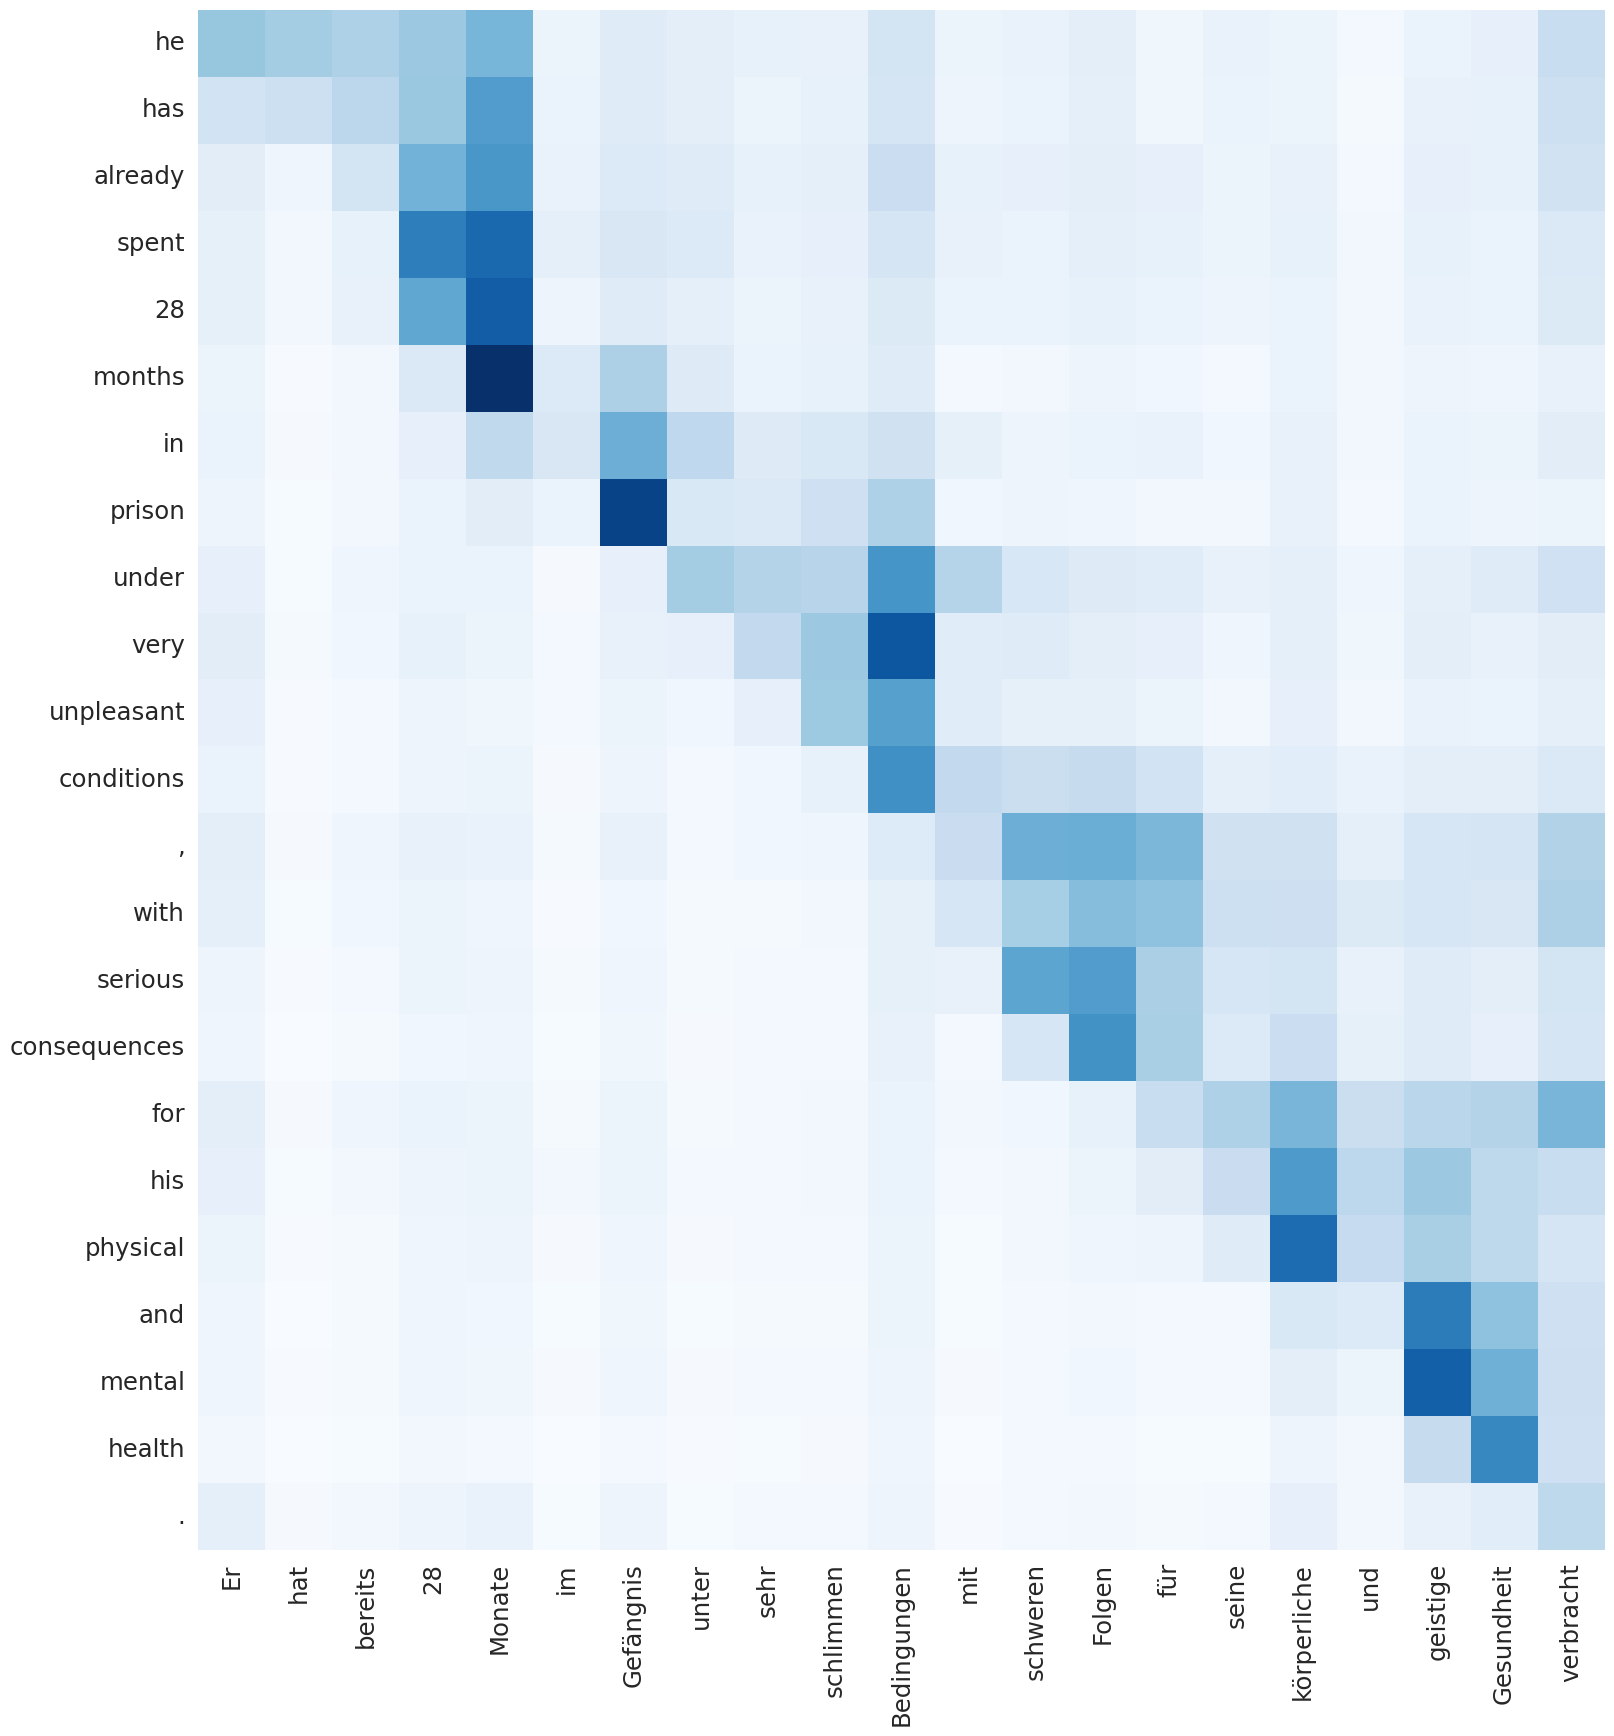

In [26]:
plt.figure(figsize=(20,20))
df = pd.DataFrame(contributions, columns = source_sentence_, index = predicted_sentence_)
sns.set(font_scale=1.6)
sns.heatmap(df,cmap="Blues",square=True,cbar=False);
plt.savefig('post_preprocess.pdf', bbox_inches='tight')

Extract hard alignments

In [19]:
hard_alignment, alignment_string = get_alignments(contributions[:-1,:], source_sentence_, predicted_sentence_[:-1])

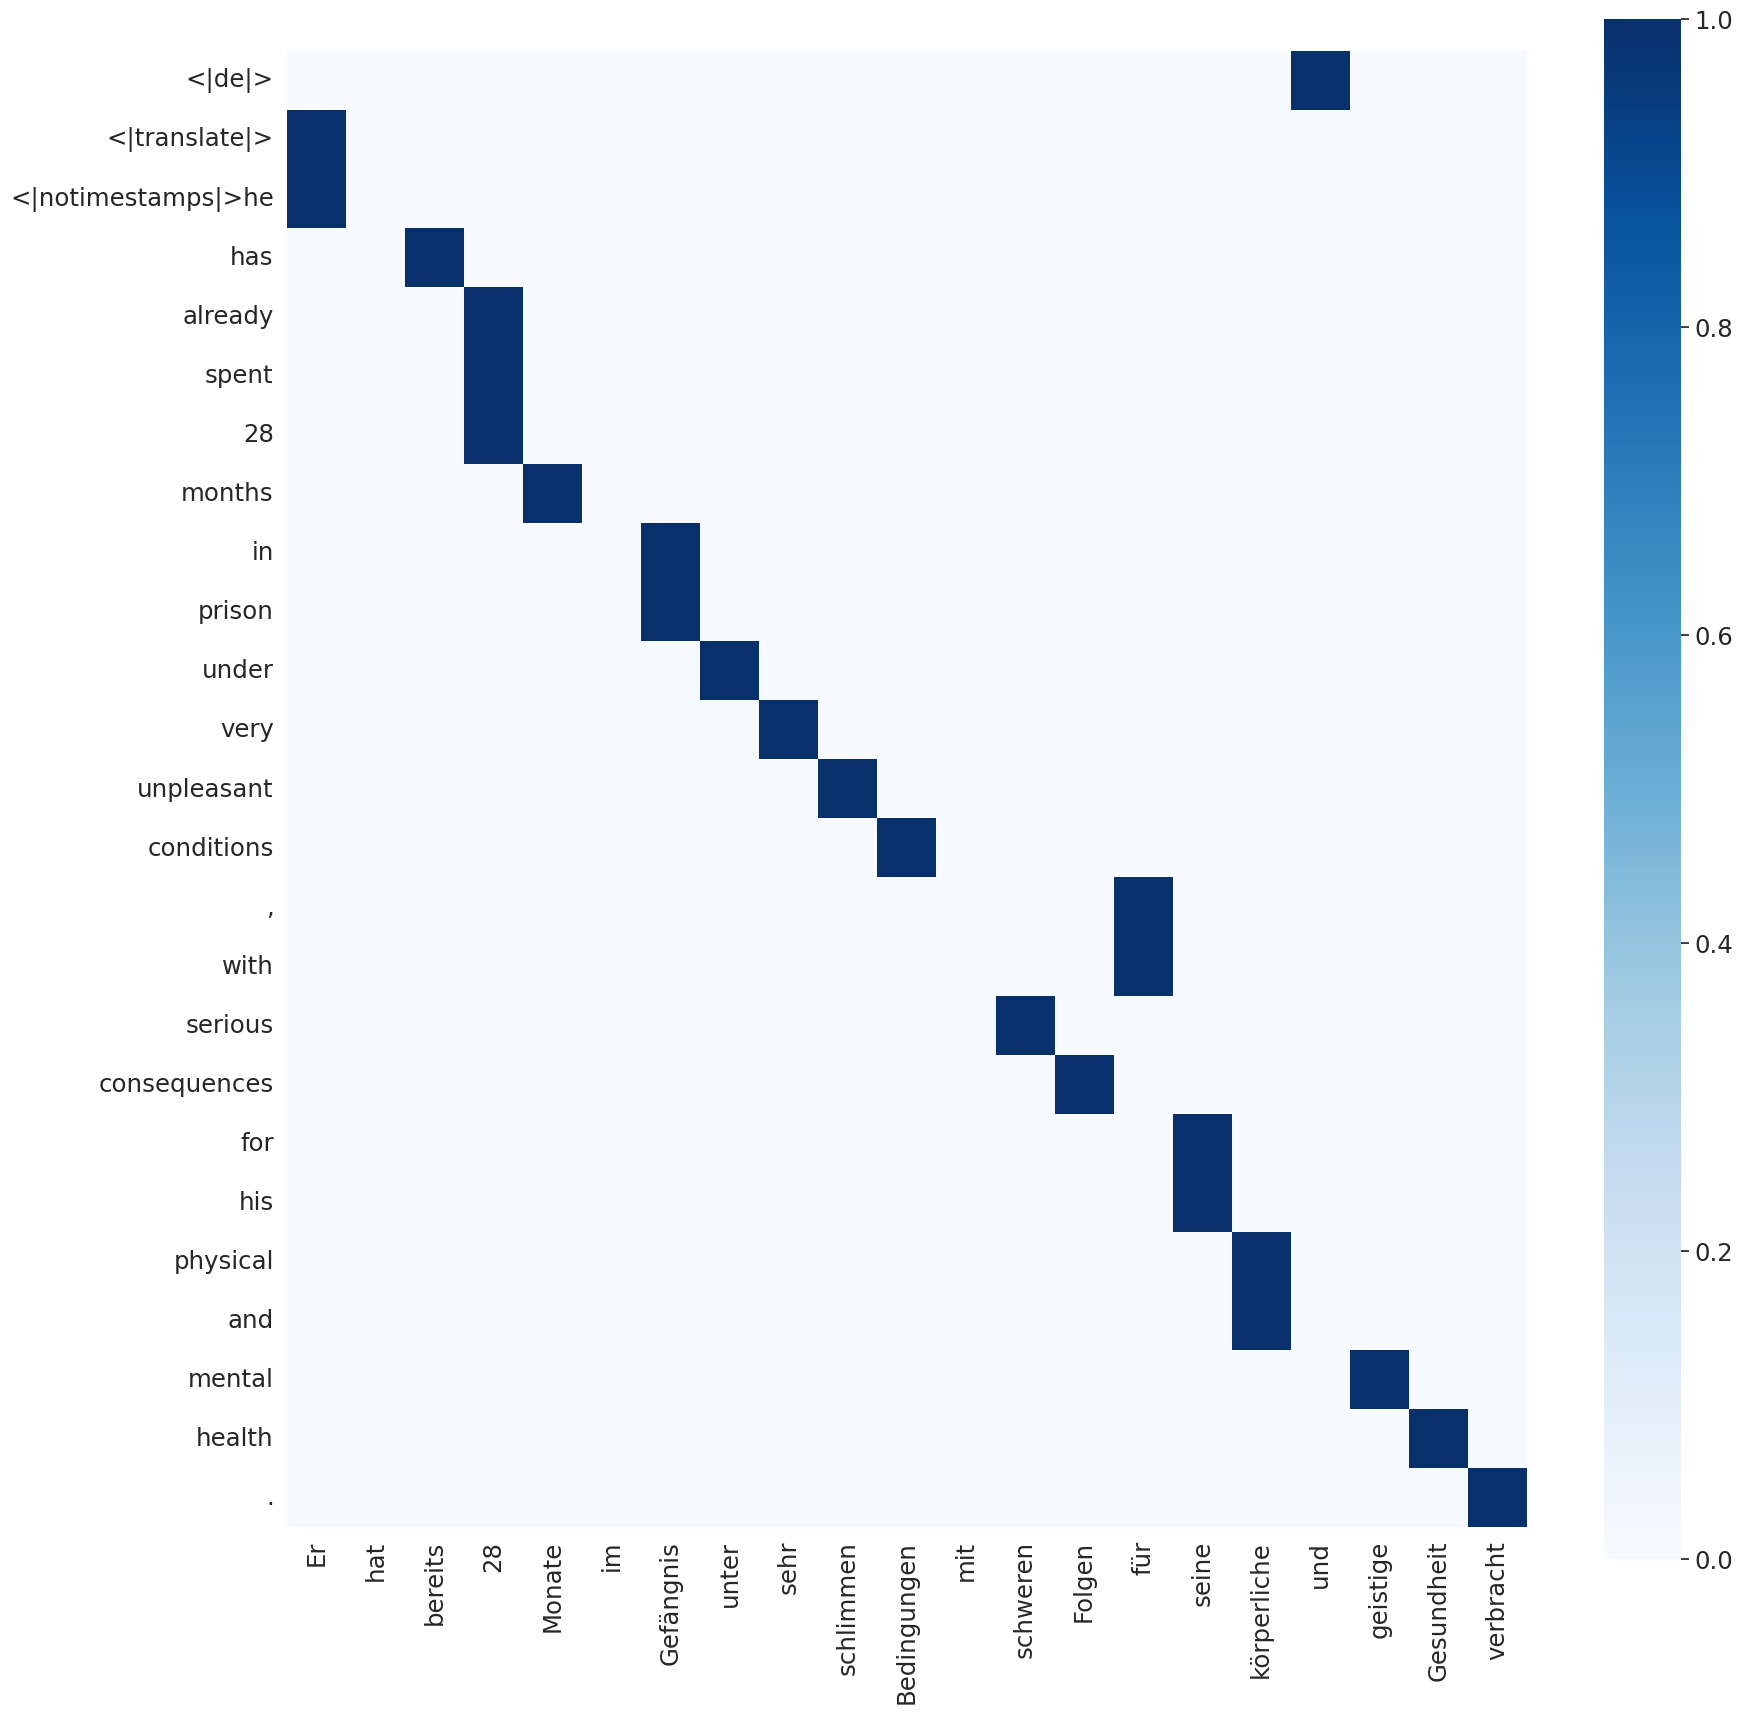

In [20]:
plt.figure(figsize=(20,20))
df = pd.DataFrame(hard_alignment, columns=separate_words(source_sentence_), index = separate_words(predicted_sentence_[:-1]))
sns.set(font_scale=1.6)
sns.heatmap(df,cmap="Blues",square=True,cbar=True);